<a href="https://colab.research.google.com/github/CrisGiacomazzi/Indigenous-Health-Access/blob/main/Indigenous_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Libraries used

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
# @title Reading datasets

dataset_1 = pd.read_csv('/content/health_literacy_data.csv')
dataset_2 = pd.read_excel('/content/health_literacy_dataset_2.xlsx')
dataset_3 = pd.read_json('/content/health_literacy_dataset_3.json')

In [ ]:
# @title Exploring the Datasets

dataset_1.head()

,Patient ID,Indigenous Community,HLQ Before,HLQ After
0,1,Métis,1,2
1,2,Inuit,2,3
2,3,First Nations,3,4
3,4,First Nations,1,2
4,5,Métis,2,3


In [ ]:
dataset_1.columns

Index(['Patient ID', 'Indigenous Community', 'HLQ Before', 'HLQ After'], dtype='object')

In [ ]:
dataset_1.shape

(260, 4)

In [ ]:
# @title Changing the column names
def change_column_name(df):
  df.columns = df.columns.str.replace('HLQ Before', 'HQL_before')
  df.columns = df.columns.str.replace('HLQ After', 'HQL_after')
  return df

dataset_1 = change_column_name(dataset_1)

In [ ]:
dataset_1.head()

,Patient ID,Indigenous Community,HQL_before,HQL_after
0,1,Métis,1,2
1,2,Inuit,2,3
2,3,First Nations,3,4
3,4,First Nations,1,2
4,5,Métis,2,3


In [ ]:
dataset_2.head()

,Patient ID,Racism_discrimination_before,Racism_discrimination_after,Cultural_healthcare_services_before,Cultural_healthcare_services_after,Traditional_methods_before,Traditional_methods_after
0,1,No,No,No,No,No,Yes
1,2,No,No,No,No,No,No
2,3,No,No,No,No,No,Yes
3,4,No,No,No,No,No,No
4,5,No,No,No,Yes,No,No


In [ ]:
dataset_2.shape

(260, 7)

In [ ]:
dataset_3.head()

,Patient ID,Number_Vis_ER_before,Number_Vis_ER_after,Cost_ER_before,Cost_ER_after
0,1,3,3,763.61,610.89
1,2,5,4,993.89,795.11
2,3,4,3,472.01,377.61
3,4,4,3,704.25,563.40
4,5,3,3,924.71,739.77


In [ ]:
dataset_3.shape

(260, 5)

In [ ]:
# @title Join Datasets
# Full Join

# First, merge dataset_1 and dataset_2
merged_dataset = pd.merge(dataset_1, dataset_2, on='Patient ID', how='outer')

# Merge the result with dataset_3
final_dataset = pd.merge(merged_dataset, dataset_3, on='Patient ID', how='outer')

# Display the final merged dataset
final_dataset.head()

,Patient ID,Indigenous Community,HQL_before,HQL_after,Racism_discrimination_before,Racism_discrimination_after,Cultural_healthcare_services_before,Cultural_healthcare_services_after,Traditional_methods_before,Traditional_methods_after,Number_Vis_ER_before,Number_Vis_ER_after,Cost_ER_before,Cost_ER_after
0,1,Métis,1,2,No,No,No,No,No,Yes,3,3,763.61,610.89
1,2,Inuit,2,3,No,No,No,No,No,No,5,4,993.89,795.11
2,3,First Nations,3,4,No,No,No,No,No,Yes,4,3,472.01,377.61
3,4,First Nations,1,2,No,No,No,No,No,No,4,3,704.25,563.40
4,5,Métis,2,3,No,No,No,Yes,No,No,3,3,924.71,739.77


In [ ]:
final_dataset.columns

Index(['Patient ID', 'Indigenous Community', 'HQL_before', 'HQL_after',
       'Racism_discrimination_before', 'Racism_discrimination_after',
       'Cultural_healthcare_services_before',
       'Cultural_healthcare_services_after', 'Traditional_methods_before',
       'Traditional_methods_after', 'Number_Vis_ER_before',
       'Number_Vis_ER_after', 'Cost_ER_before', 'Cost_ER_after'],
      dtype='object')

In [ ]:
final_dataset.shape

(260, 14)

In [ ]:
# @title Cleaning Step

# Count missing values in each column of the final_dataset
missing_values_count = final_dataset.isnull().sum()

# Print the count of missing values for each column
print(missing_values_count)

# Calculate the total number of missing values in the entire dataset
total_missing = missing_values_count.sum()

# Print the total number of missing values
print(f"\nTotal missing values in the final dataset: {total_missing}")

Patient ID                             0
Indigenous Community                   0
HQL_before                             0
HQL_after                              0
Racism_discrimination_before           0
Racism_discrimination_after            0
Cultural_healthcare_services_before    0
Cultural_healthcare_services_after     0
Traditional_methods_before             0
Traditional_methods_after              0
Number_Vis_ER_before                   0
Number_Vis_ER_after                    0
Cost_ER_before                         0
Cost_ER_after                          0
dtype: int64

Total missing values in the final dataset: 0


In [ ]:
final_dataset.duplicated().sum()

0

In [ ]:
# @title Types of variables

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient ID                           260 non-null    int64  
 1   Indigenous Community                 260 non-null    object 
 2   HQL_before                           260 non-null    int64  
 3   HQL_after                            260 non-null    int64  
 4   Racism_discrimination_before         260 non-null    object 
 5   Racism_discrimination_after          260 non-null    object 
 6   Cultural_healthcare_services_before  260 non-null    object 
 7   Cultural_healthcare_services_after   260 non-null    object 
 8   Traditional_methods_before           260 non-null    object 
 9   Traditional_methods_after            260 non-null    object 
 10  Number_Vis_ER_before                 260 non-null    int64  
 11  Number_Vis_ER_after             

In [ ]:
final_dataset.describe()

,Patient ID,HQL_before,HQL_after,Number_Vis_ER_before,Number_Vis_ER_after,Cost_ER_before,Cost_ER_after
count,260.000000,260.00000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,130.500000,2.35000,3.169231,3.607692,3.053846,701.606538,561.285500
std,75.199734,1.07112,0.834937,1.065399,0.689822,186.079250,148.863444
min,1.000000,1.00000,2.000000,1.000000,1.000000,392.650000,314.120000
25%,65.750000,1.00000,2.000000,3.000000,3.000000,557.487500,445.987500
50%,130.500000,2.00000,3.000000,4.000000,3.000000,716.555000,573.245000
75%,195.250000,3.00000,4.000000,4.000000,3.000000,862.832500,690.270000
max,260.000000,4.00000,4.000000,6.000000,5.000000,995.680000,796.540000


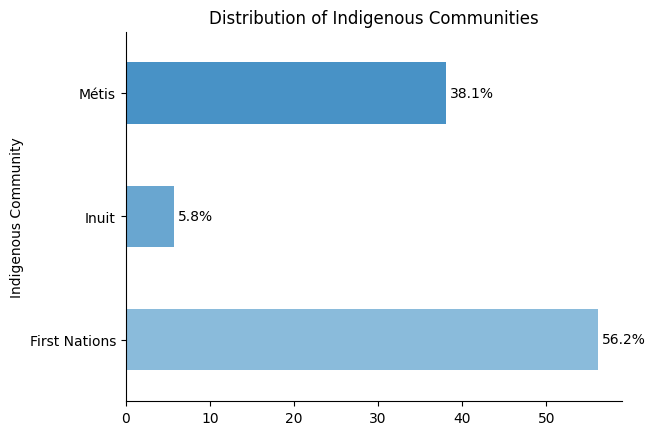

In [ ]:
# @title Distribution of Indigenous  Communities in the Program

# Calculating counts and percentages
counts = final_dataset.groupby('Indigenous Community').size()
total = counts.sum()
percentages = counts / total * 100

# Creatin the bar plot
ax = percentages.plot(kind='barh', color=sns.palettes.mpl_palette('Blues_d'))
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels and customize x-axis ticks
plt.title("Distribution of Indigenous Communities")

# Adding percentage labels to bars
for i, v in enumerate(percentages):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.show()

In [ ]:
# @title Distributions

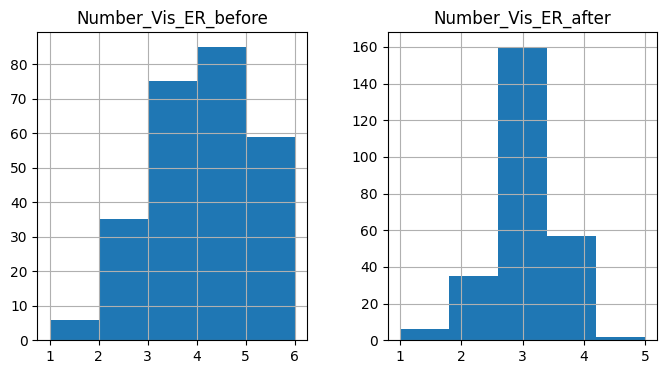

In [ ]:
histogram_Number_Vis_ER = final_dataset[['Number_Vis_ER_before', 'Number_Vis_ER_after']].hist(bins=5, figsize=(8, 4))

In [ ]:
# @title Perform Shapiro-Wilk test
statistic_before, p_value_before = shapiro(final_dataset['Number_Vis_ER_before'].dropna())
statistic_after, p_value_after = shapiro(final_dataset['Number_Vis_ER_after'].dropna())

print(f"Shapiro-Wilk Test for Number_Vis_ER_before:")
print(f"Statistic: {statistic_before}")
print(f"P-value: {p_value_before}")

print(f"\nShapiro-Wilk Test for Number_Vis_ER_after:")
print(f"Statistic: {statistic_after}")
print(f"P-value: {p_value_after}")

alpha = 0.05  # significance level
# H0 =
# H1 =

print("\nInterpretation:")
if p_value_before > alpha:
    print("Number_Vis_ER_before: Sample looks Gaussian (fail to reject H0)")
else:
    print("Number_Vis_ER_before: Sample does not look Gaussian (reject H0)")

if p_value_after > alpha:
    print("Number_Vis_ER_after: Sample does looks Gaussian (fail to reject H0)")
else:
    print("Number_Vis_ER_after: Sample does not look Gaussian (fail to reject H0)")

Shapiro-Wilk Test for Number_Vis_ER_before:
Statistic: 0.9087988122027145
P-value: 1.7824719557211252e-11

Shapiro-Wilk Test for Number_Vis_ER_after:
Statistic: 0.8068688412378896
P-value: 2.877479315107992e-17

Interpretation:
Number_Vis_ER_before: Sample does not look Gaussian (reject H0)
Number_Vis_ER_after: Sample does not look Gaussian (fail to reject H0)


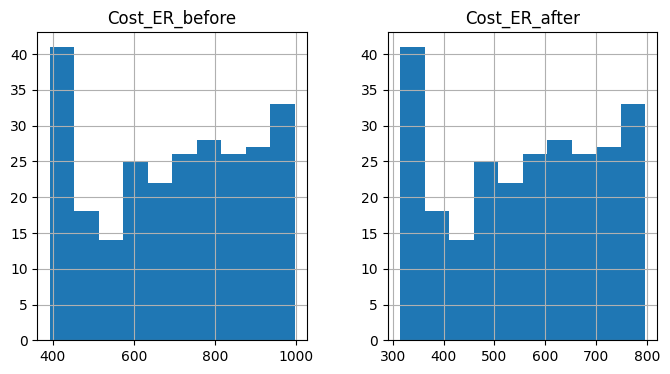

In [ ]:
histogram_Cost_ER = final_dataset[['Cost_ER_before', 'Cost_ER_after']].hist(bins=10, figsize=(8, 4))

In [ ]:
# @title Skewness and kurtosis

# Calculate skewness and kurtosis
numerical_cols = ['Number_Vis_ER_before', 'Number_Vis_ER_after', 'Cost_ER_before', 'Cost_ER_after']

for col in numerical_cols:
    if col in final_dataset.columns:
        skewness = final_dataset[col].skew()
        kurtosis = final_dataset[col].kurt()
        print(f"Skewness of {col}: {skewness}")
        print(f"Kurtosis of {col}: {kurtosis}")
    else:
        print(f"Column '{col}' not found in the dataset.")


Skewness of Number_Vis_ER_before: -0.264813157238385
Kurtosis of Number_Vis_ER_before: -0.5716257285548156
Skewness of Number_Vis_ER_after: -0.35500484637994123
Kurtosis of Number_Vis_ER_after: 0.8792156465858589
Skewness of Cost_ER_before: -0.13454424080045055
Kurtosis of Cost_ER_before: -1.2252372383002468
Skewness of Cost_ER_after: -0.13454648345182277
Kurtosis of Cost_ER_after: -1.2252337237682667


Both variables assimetrics

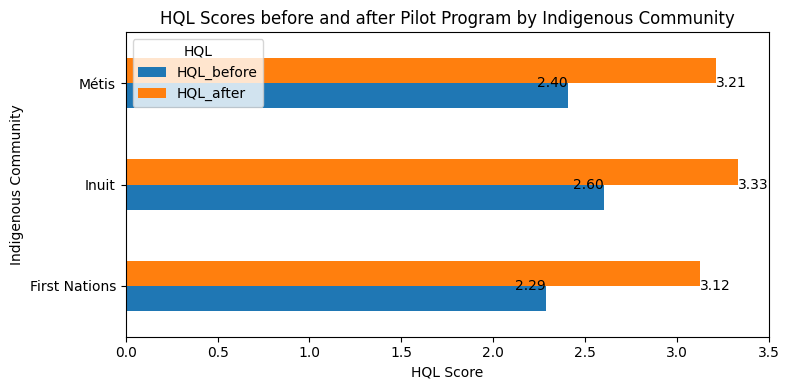

In [ ]:
# @title Results before and after

# Group by 'Indigenous Community' and calculate the mean of HQL_before and HQL_after
grouped_df = final_dataset.groupby('Indigenous Community')[['HQL_before', 'HQL_after']].mean()

# Plotting
ax = grouped_df.plot(kind='barh', figsize=(8, 4))

# Adding labels and title
plt.xlabel('HQL Score')
plt.ylabel('Indigenous Community')
plt.title('HQL Scores before and after Pilot Program by Indigenous Community')
plt.legend(title='HQL', bbox_to_anchor=(0, 1), loc='upper left')

# Annotate the bars
for i, (before, after) in enumerate(zip(grouped_df['HQL_before'], grouped_df['HQL_after'])):
    ax.text(before, i, f'{before:.2f}', va='center', ha='right', color='black')
    ax.text(after, i, f'{after:.2f}', va='center', ha='left', color='black')

# Show the plot
plt.tight_layout()
plt.show()

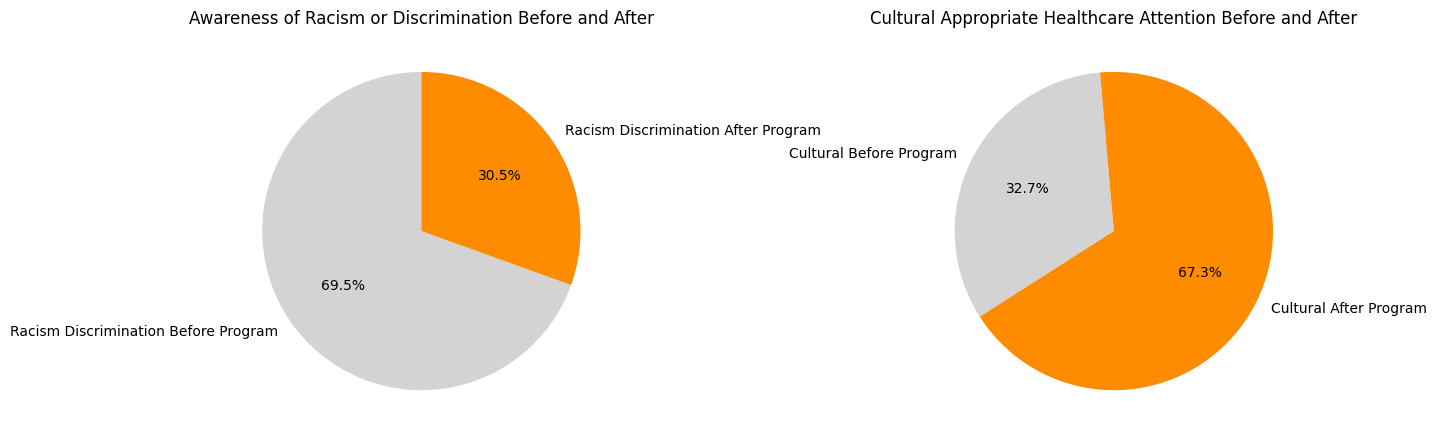

In [ ]:
# @title Racism and Cultural service Before and After

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #1 row, 2 columns

# First Pie Chart: Racism Discrimination
yes_before_racism = final_dataset['Racism_discrimination_before'].value_counts().get('Yes', 0)
yes_after_racism = final_dataset['Racism_discrimination_after'].value_counts().get('Yes', 0)

labels_racism = ['Racism Discrimination Before Program', 'Racism Discrimination After Program']
yes_counts_racism = [yes_before_racism, yes_after_racism]

axes[0].pie(yes_counts_racism, labels=labels_racism, autopct='%1.1f%%', startangle=90, colors=['#D3D3D3','#FF8C00'])
axes[0].set_title('Awareness of Racism or Discrimination Before and After')

# Second Pie Chart: Cultural Healthcare Services
yes_before_cultural = final_dataset['Cultural_healthcare_services_before'].value_counts().get('Yes', 0)
yes_after_cultural = final_dataset['Cultural_healthcare_services_after'].value_counts().get('Yes', 0)

labels_cultural = ['Cultural Before Program', 'Cultural After Program']
yes_counts_cultural = [yes_before_cultural, yes_after_cultural]

axes[1].pie(yes_counts_cultural, labels=labels_cultural, autopct='%1.1f%%', startangle=95, colors=['#D3D3D3', '#FF8C00'])
axes[1].set_title('Cultural Appropriate Healthcare Attention Before and After')

# Adjust layout and display
plt.tight_layout()
plt.show()

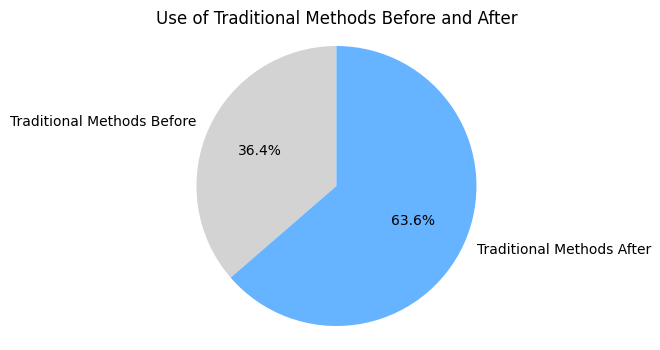

In [ ]:
# @title Use of Traditional methods Before and After

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(6, 4))

# Data for the pie chart
labels = ['Traditional Methods Before', 'Traditional Methods After']
yes_before_traditional = final_dataset['Traditional_methods_before'].value_counts().get('Yes', 0)
yes_after_traditional = final_dataset['Traditional_methods_after'].value_counts().get('Yes', 0)
sizes = [yes_before_traditional, yes_after_traditional]
colors = ['#D3D3D3', '#66b3ff'] # Example colors, change as needed

# Create the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
ax.set_title('Use of Traditional Methods Before and After')


# Display the chart
plt.show()


<ipython-input-178-7cd640e4e258>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])


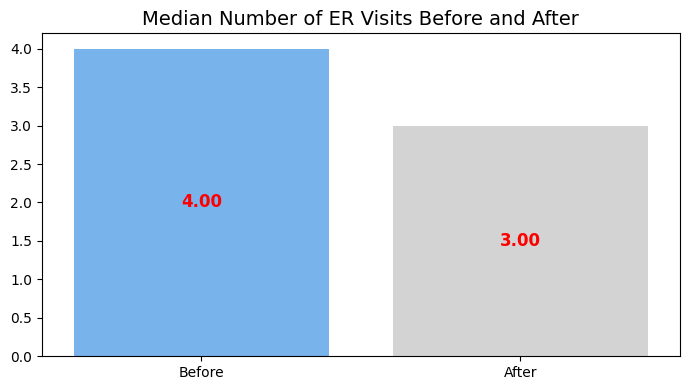

In [ ]:
# @title Number of Visits in the Emergency Room

# Calculate the median values
median_before = final_dataset['Number_Vis_ER_before'].median()
median_after = final_dataset['Number_Vis_ER_after'].median()

# Create the bar chart
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])

plt.title('Median Number of ER Visits Before and After', fontsize=14)

# Add labels on top of each bar
for i, value in enumerate([median_before, median_after]):
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='red', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-179-6b16181676fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])


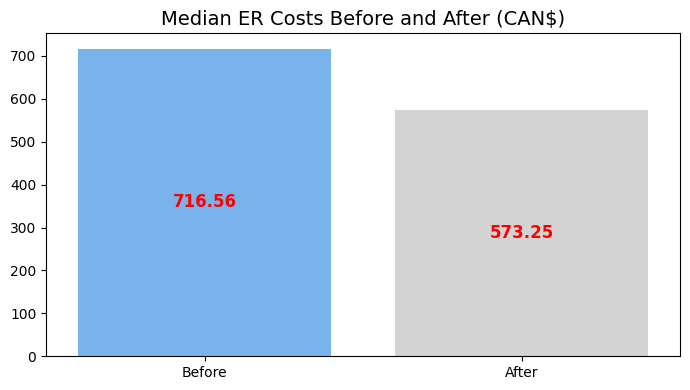

In [ ]:
# @title Costs to Emergency Department

# Calculate the median values
median_before = final_dataset['Cost_ER_before'].median()
median_after = final_dataset['Cost_ER_after'].median()

# Create the bar chart
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=['Before', 'After'], y=[median_before, median_after], palette=['#66b3ff', '#D3D3D3'])

plt.title('Median ER Costs Before and After (CAN$)', fontsize=14)

# Add labels on top of each bar
for i, value in enumerate([median_before, median_after]):
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='red', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# @title Relations among variables



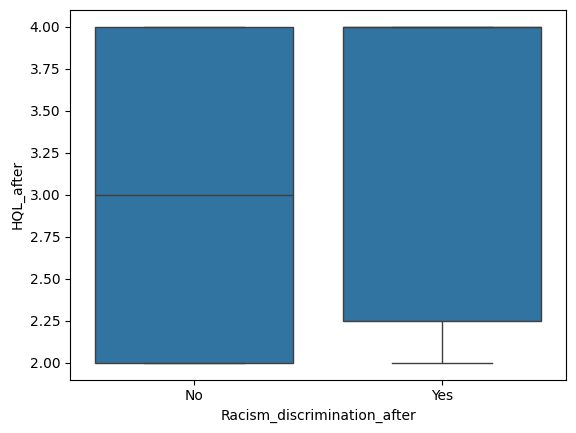

In [ ]:
# @title Bivariate Analysis

# HQL x Racism

sns.boxplot(x='Racism_discrimination_after', y='HQL_after', data=final_dataset)
plt.show()

The health literacy is slightly higher for the group who does not identify racism after the pilot program.

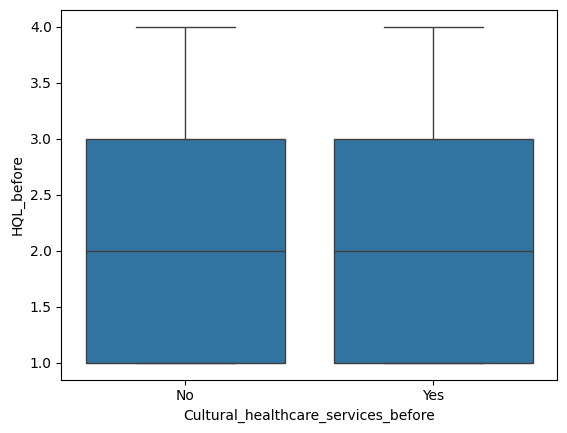

In [ ]:
# HQL x Culture

sns.boxplot(x='Cultural_healthcare_services_before', y='HQL_before', data=final_dataset)
plt.show()

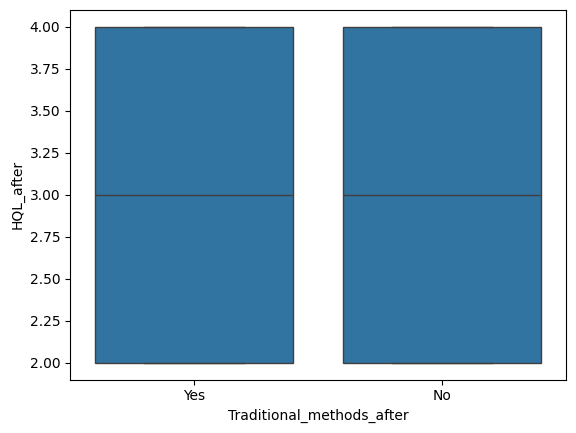

In [ ]:
# HQL x Traditional Methos

sns.boxplot(x='Traditional_methods_after', y='HQL_after', data=final_dataset)
plt.show()

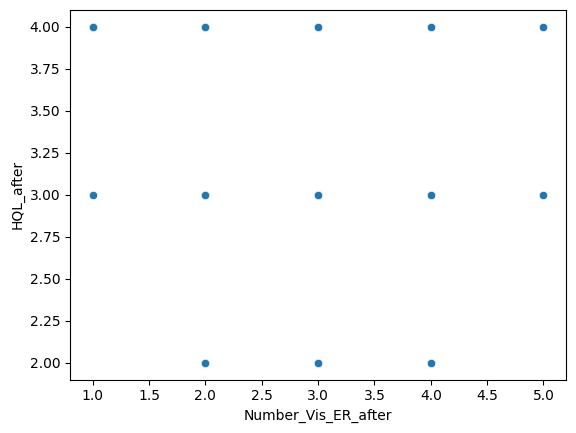

In [ ]:
# HQL x Number of visits in ER room

sns.scatterplot(x='Number_Vis_ER_after', y='HQL_after', data=final_dataset)
plt.show()

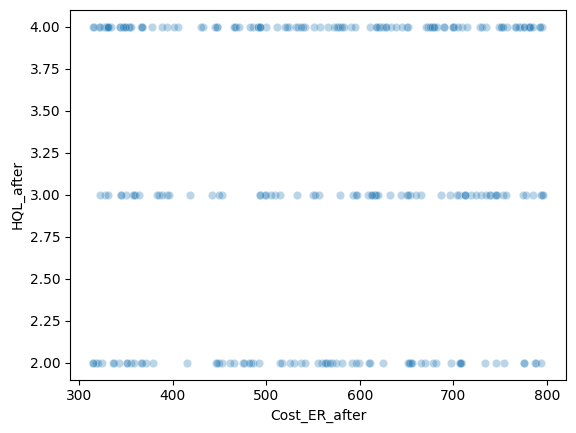

In [ ]:
# HQL x Costs

sns.scatterplot(x='Cost_ER_after', y='HQL_after', data=final_dataset, alpha=0.3)
plt.show()

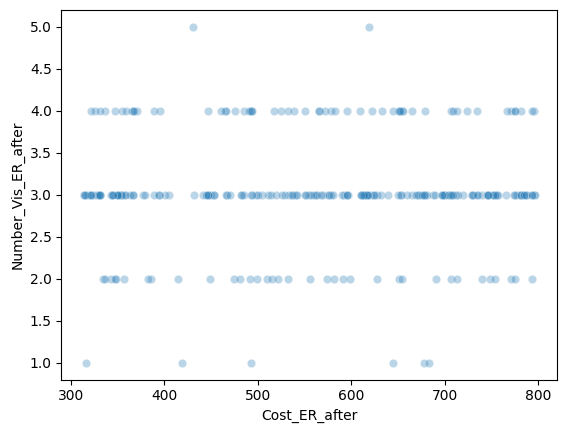

In [ ]:
sns.scatterplot(x='Cost_ER_after', y='Number_Vis_ER_after', data=final_dataset, alpha=0.3)
plt.show()

In [ ]:
# @title Multivariate Analysis

# Preparing dataset: Drop specified columns
columns_to_drop = ['Patient ID', 'Indigenous Community']
final_dataset = final_dataset.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
# Create dummy variables for the specified features
features_to_encode = ['Racism_discrimination_before', 'Racism_discrimination_after',
                      'Cultural_healthcare_services_before',
                      'Cultural_healthcare_services_after', 'Traditional_methods_before',
                      'Traditional_methods_after']

# Use pandas get_dummies to create dummy variables
final_dataset = pd.get_dummies(final_dataset, columns=features_to_encode, drop_first=True)

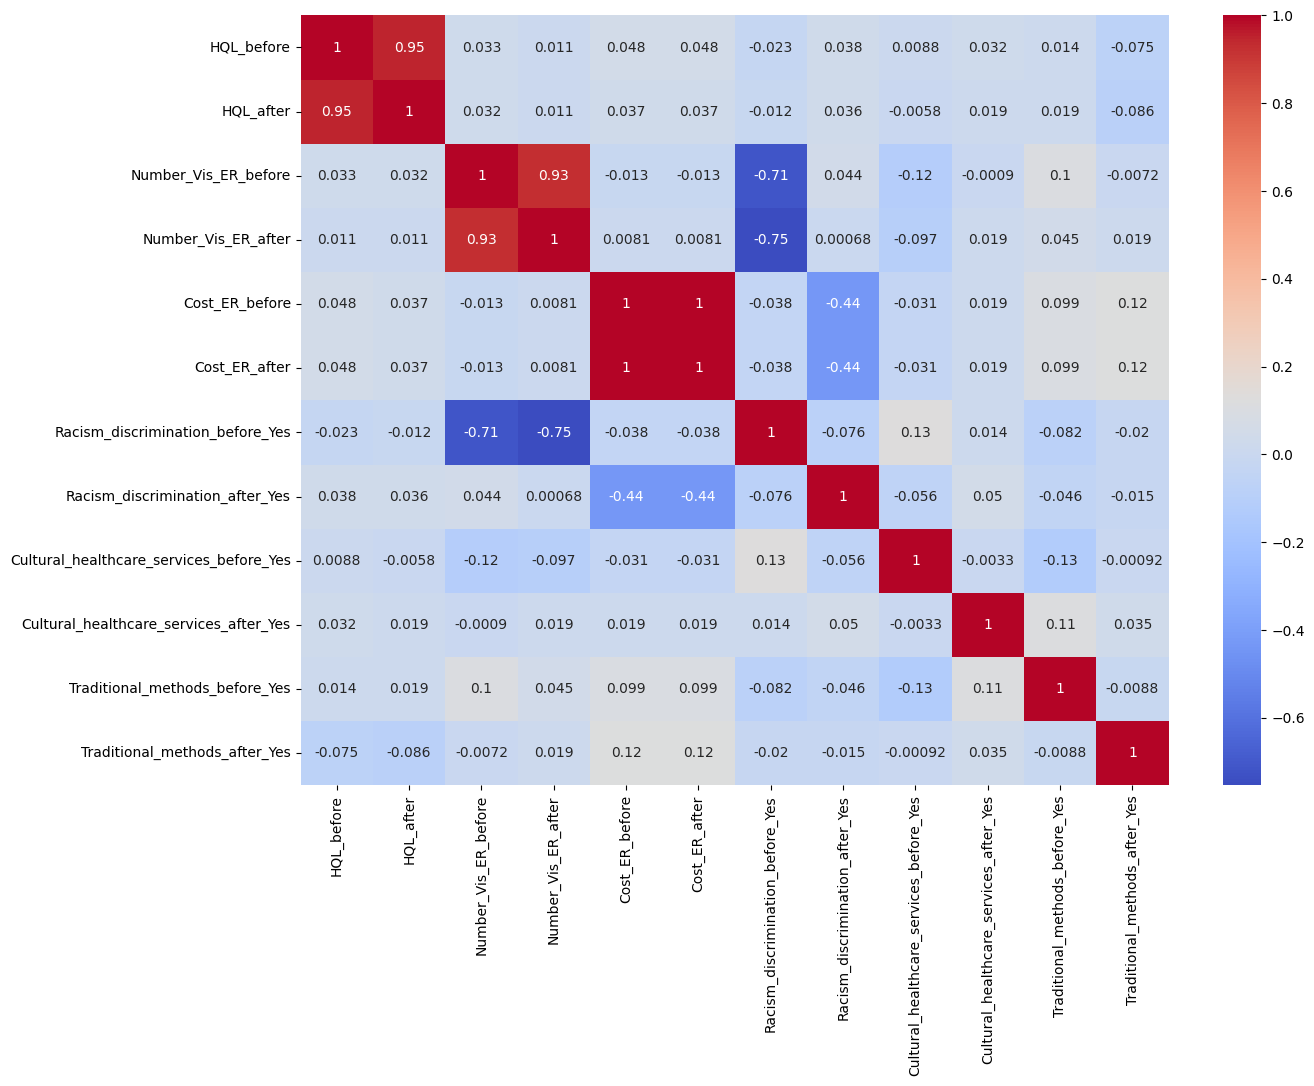

In [ ]:
# Correlation Matrix

plt.figure(figsize=(14, 10))
correlation_matrix = final_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

*   Number of visits before and after the pilot program are negatively and strongly related with racism
*   Costs are negatively related with racism




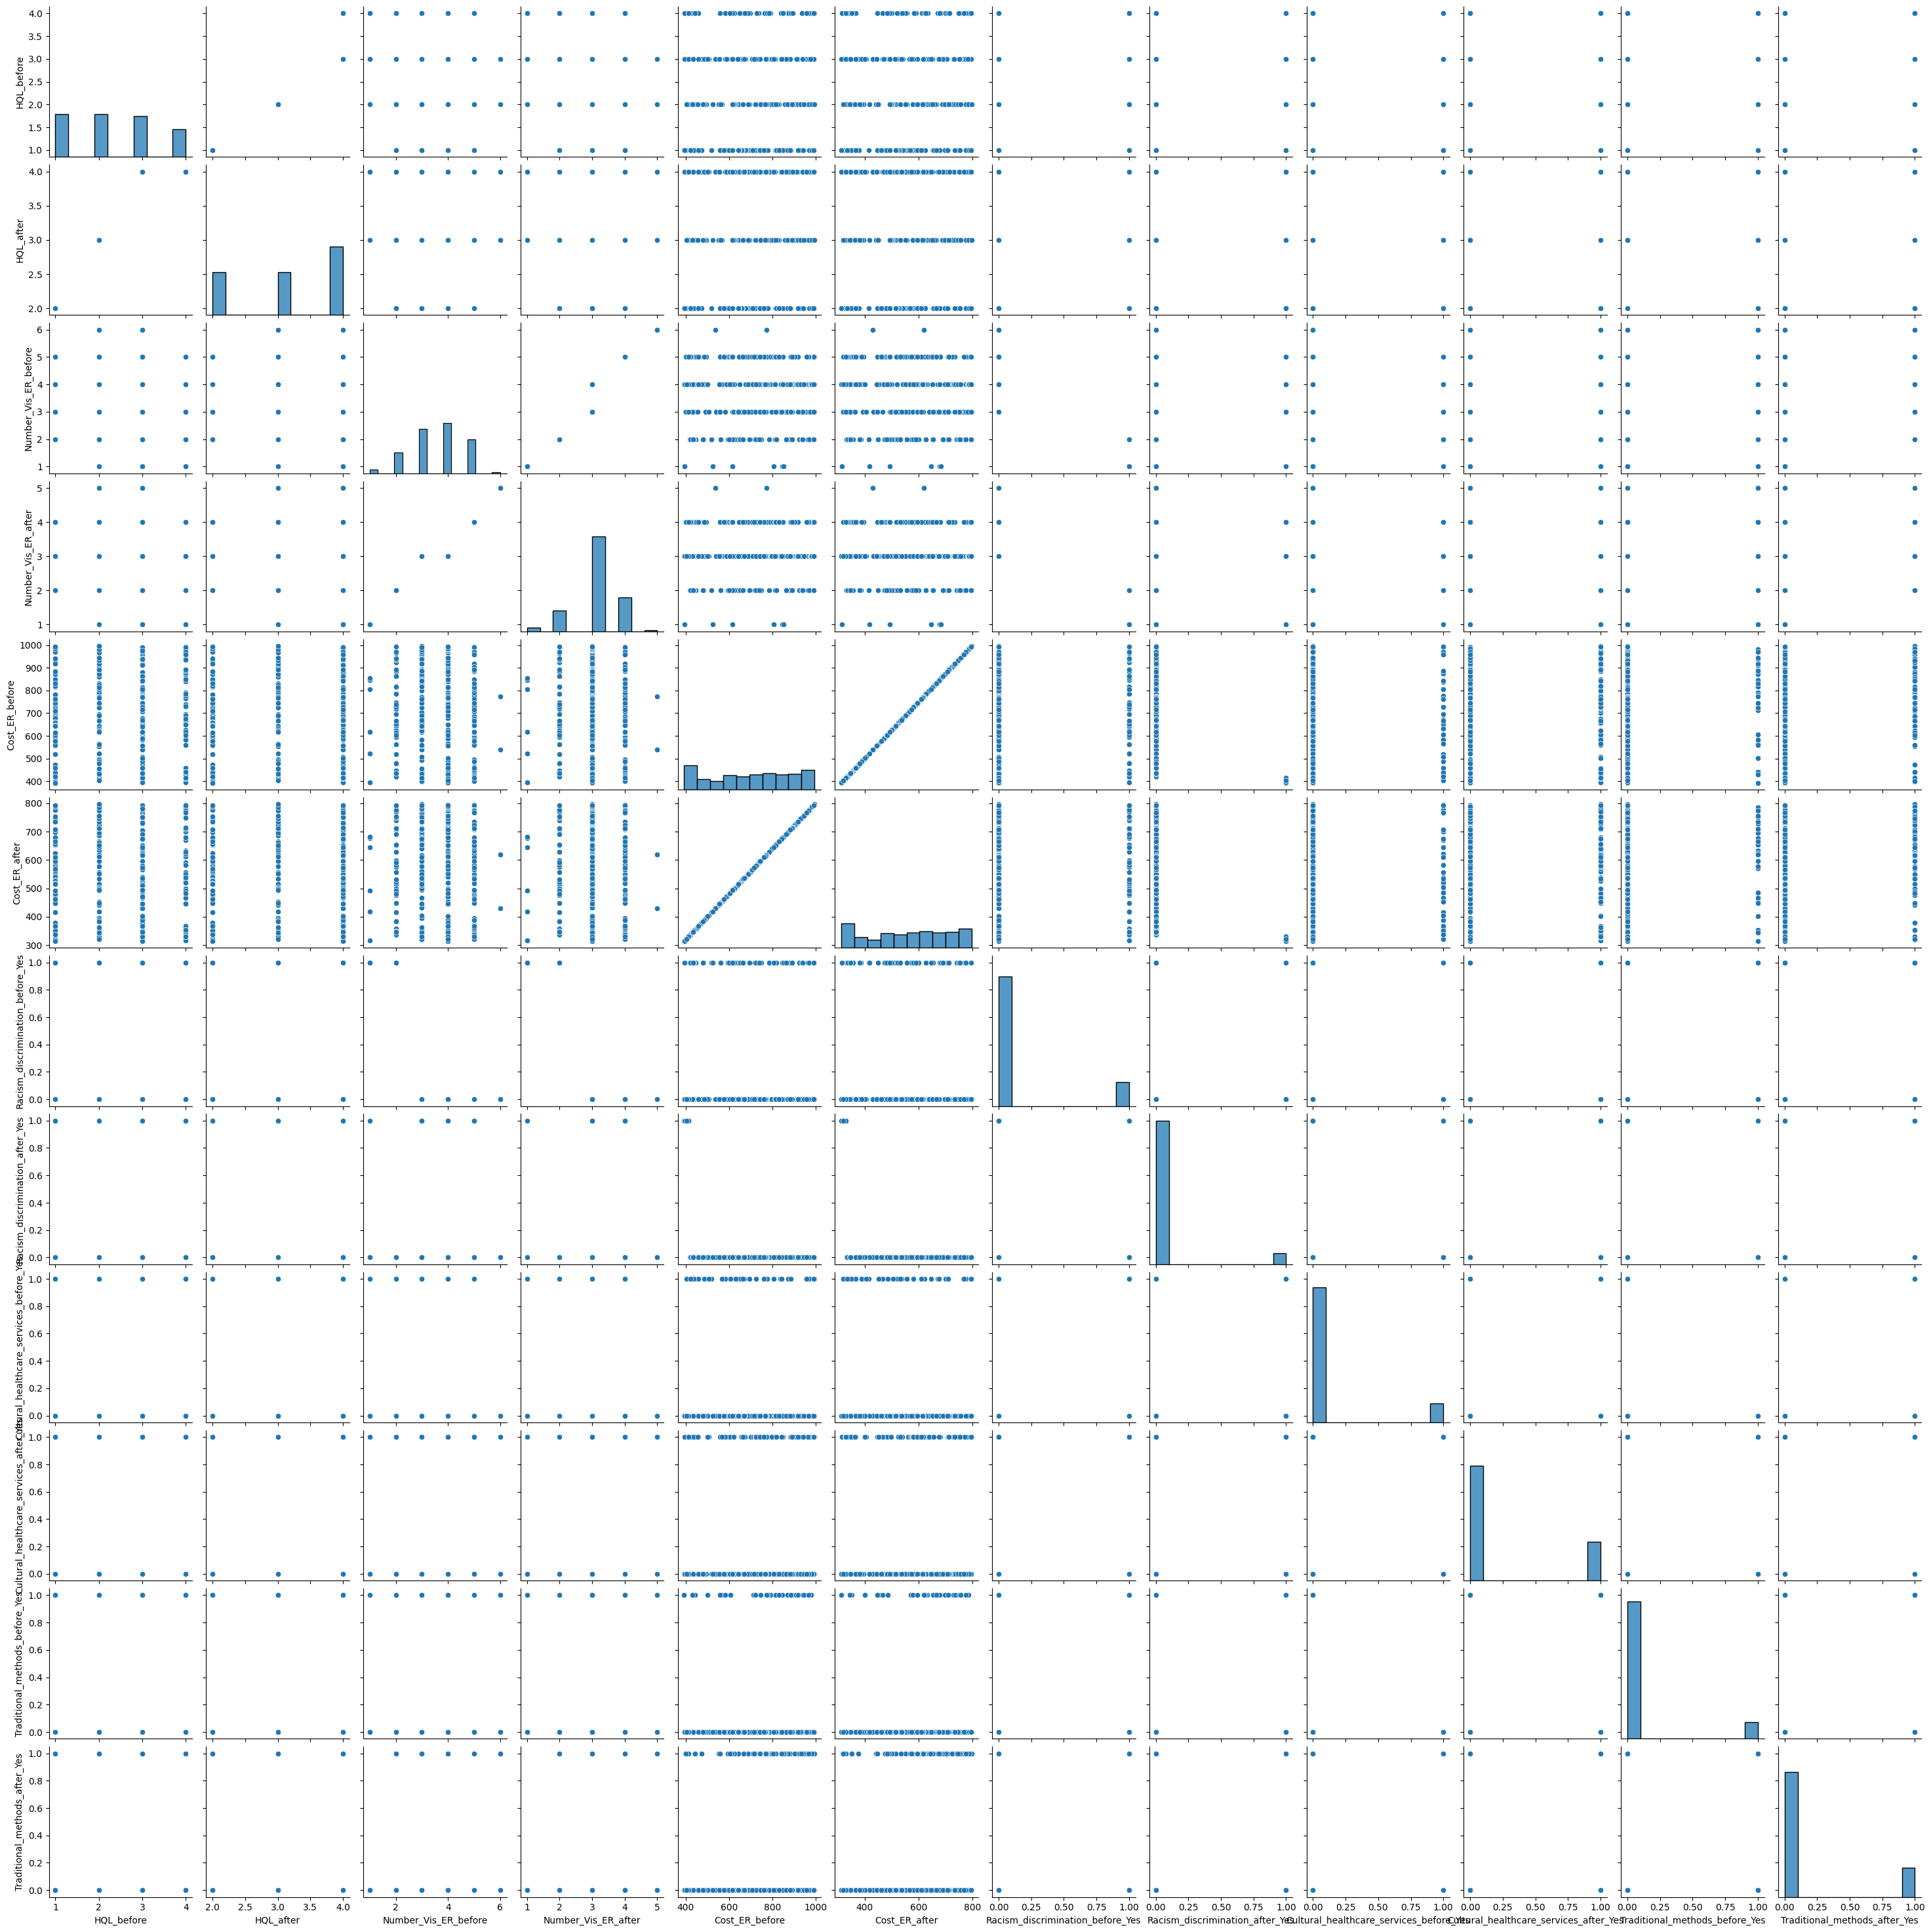

In [ ]:
# General visualization

sns.pairplot(final_dataset)
plt.show()

In [ ]:
# @title New Dataset

final_dataset.to_csv('cleaned_dataset.csv', index=False)